# Задание 9

In [ ]:
!pip install --upgrade xlrd

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
import scipy
from scipy.optimize import differential_evolution, minimize

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

In [ ]:
data=pd.read_excel('data.xls', sheet_name='Income')
data.head()

In [ ]:
dates =data.loc[data.index==0].values[0,2:]
val =data.loc[data.index==1].values[0,2:]

In [ ]:
data={'Date':dates,'Value':val}

In [ ]:
df=pd.DataFrame(data)
df.head()

In [ ]:
df=df.set_index('Date')
df.head()

In [ ]:
df.info()

In [ ]:
df.Value = df.Value.astype(float)

In [ ]:
df.info()

In [ ]:
df

In [ ]:
alpha=0.99

In [ ]:
df['t']=np.array([i for i in range(1,len(df)+1)])

In [ ]:
df['v']=np.array([alpha*(1-alpha)**(len(df)-i) for i in range(1,len(df)+1)])

In [ ]:
b=(np.sum(df['t']*df['v']*df['Value'])-np.sum(df['t']*df['v'])*np.sum(df['Value']*df['v']))/(np.sum(np.power(df['t'],2)*df['v'])-np.power(np.sum(df['t']*df['v']),2))

In [ ]:
a=np.sum(df['Value']*df['v'])-b*np.sum(df['t']*df['v'])

In [ ]:
print(a,b)

13777.668301169952 52.216329446142915


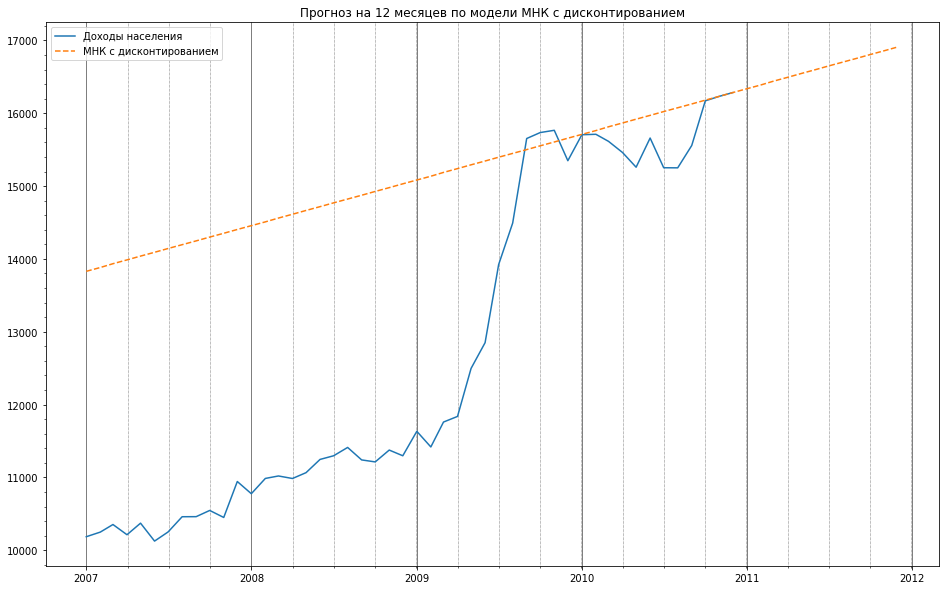

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(df) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием')

plt.show()

In [ ]:
span=10

In [ ]:
alfa=2/(span+1)
alfa

0.18181818181818182

In [ ]:
ema=df['Value'].ewm(span=span).mean()
ema.head()

Date
2007-01-01    10186.170000
2007-02-01    10221.040000
2007-03-01    10274.340299
2007-04-01    10254.325782
2007-05-01    10288.155652
Name: Value, dtype: float64

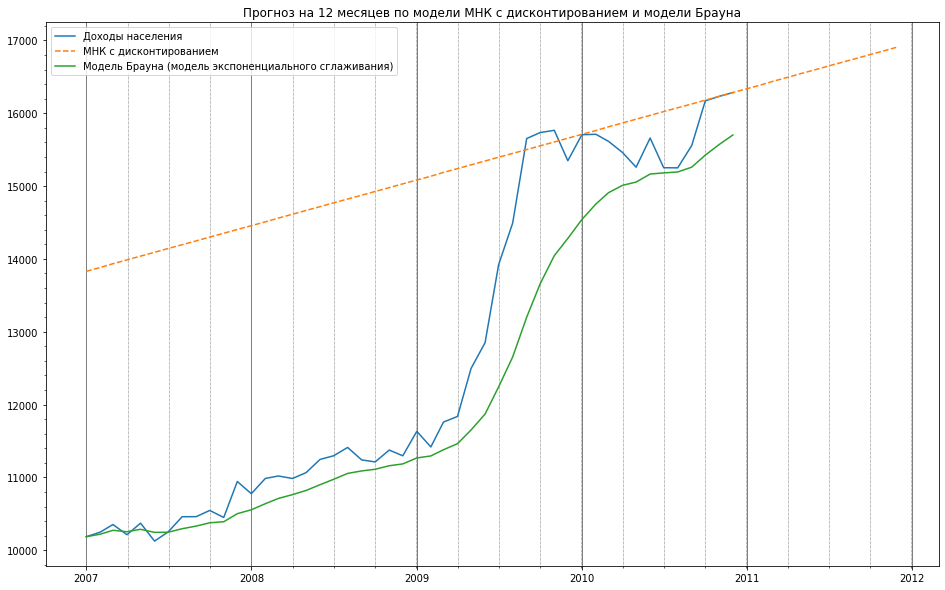

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(df) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')
ax.plot(ema,label='Модель Брауна (модель экспоненциального сглаживания)')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием и модели Брауна')

plt.show()

In [ ]:
span=3

In [ ]:
alfa=2/(span+1)
alfa

0.5

In [ ]:
ema=df['Value'].ewm(span=span).mean()
ema.head()

Date
2007-01-01    10186.170000
2007-02-01    10228.436667
2007-03-01    10299.975714
2007-04-01    10253.903333
2007-05-01    10314.944194
Name: Value, dtype: float64

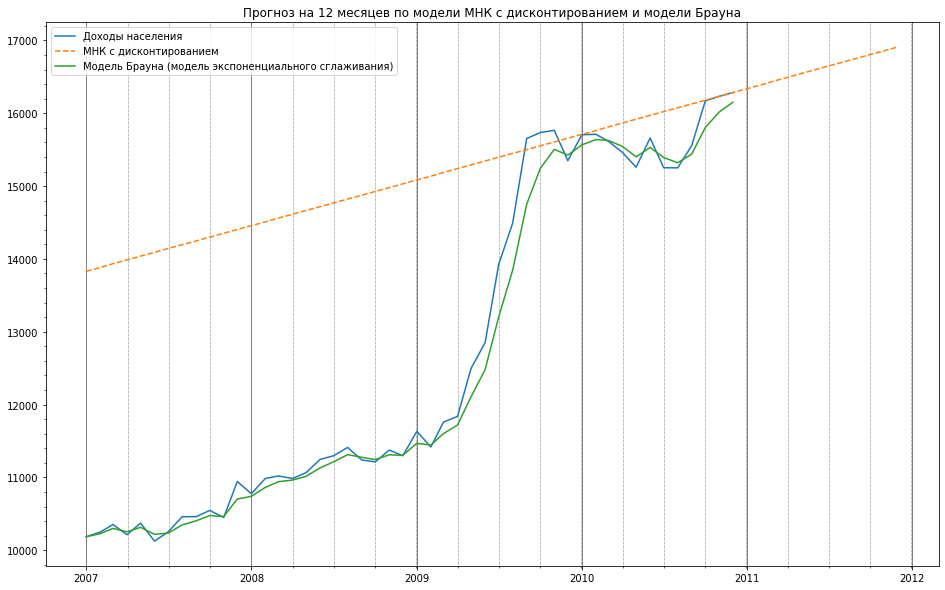

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(df) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')
ax.plot(ema,label='Модель Брауна (модель экспоненциального сглаживания)')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием и модели Брауна')

plt.show()

In [ ]:
model=SimpleExpSmoothing(df['Value'], initialization_method='estimated').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Модель Брауна**

In [ ]:
model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
initial_level,l.0,10151.099333,True


In [ ]:
y_pred=model.fittedvalues
y_pred.head()

Date
2007-01-01    10151.099333
2007-02-01    10185.994647
2007-03-01    10249.252123
2007-04-01    10353.108111
2007-05-01    10214.287591
dtype: float64

In [ ]:
y=df['Value']
y.head()

In [ ]:
MSE=mean_squared_error(y, y_pred)
MSE

In [ ]:
RMSE=sqrt(MSE)
RMSE

In [ ]:
model.predict(start=48, end=59)

In [ ]:
model.forecast(12)

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(df) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')
ax.plot(ema,label='Модель Брауна (модель экспоненциального сглаживания)')
ax.plot(model.predict(start=48, end=59), label='Прогноз по модели Брауна')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием и модели Брауна')

plt.show()

In [ ]:
model=Holt(df['Value'], initialization_method="estimated").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
y_pred=model.fittedvalues
y_pred.head()

In [ ]:
y=df['Value']
y.head()

In [ ]:
MSE=mean_squared_error(y, y_pred)
MSE

In [ ]:
RMSE=sqrt(MSE)
RMSE

In [ ]:
model.predict(start=48, end=59)

In [ ]:
y_new=model.forecast(12)
y_new

In [ ]:
np.save('income_new.npy',model.forecast(12))

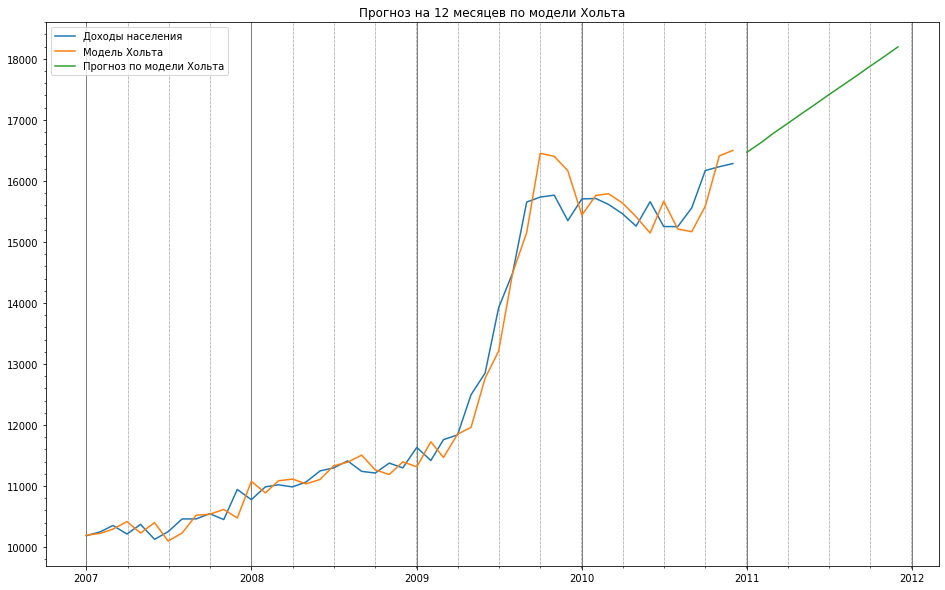

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(y_pred, label = 'Модель Хольта')
ax.plot(model.forecast(12), label = 'Прогноз по модели Хольта')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Хольта')

plt.show()

In [ ]:
sigma=scipy.stats.sem(y)
sigma

329.7461081311333

In [ ]:
conf=0.95

In [ ]:
tstu=scipy.stats.t.ppf((1+conf)/2.,len(y)-1)
tstu

2.0117405104757546

In [ ]:
y_up=y_new+tstu*sigma
y_up

In [ ]:
np.save('income_up.npy',y_up)

In [ ]:
y_down=y_new-tstu*sigma
y_down

In [ ]:
np.save('income_down.npy',y_down)

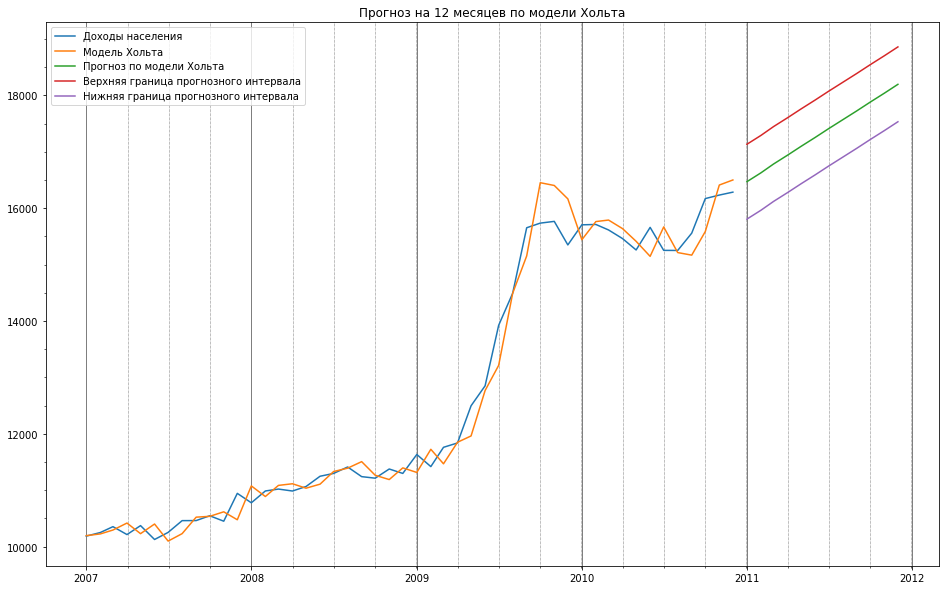

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(y_pred, label = 'Модель Хольта')
ax.plot(model.forecast(12), label = 'Прогноз по модели Хольта')
ax.plot(y_up, label = 'Верхняя граница прогнозного интервала')
ax.plot(y_down, label = 'Нижняя граница прогнозного интервала')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Хольта')

plt.show()

**Модель Хольта (используется когда есть линейный тренд)**

# **Раздел 3. Модель Хольта (модель экспоненциального сглаживания с линейным трендом)**

# **НАЧАЛО**

__________________________________________

In [ ]:
df.shape

(48, 1)

In [ ]:
series=df.squeeze() # переводим DataFrame в Series для дальнейшей работы
series.head(5)

Date
2007-01-01    10186.17
2007-02-01    10249.57
2007-03-01    10353.63
2007-04-01    10213.59
2007-05-01    10372.17
Name: Value, dtype: float64

In [ ]:
model_2=Holt(df['Value'], initialization_method="estimated").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
y_pred=model_2.fittedvalues # вытаскиваем прогнозные значения
y_pred.head()

Date
2007-01-01    10194.434098
2007-02-01    10224.836642
2007-03-01    10293.940468
2007-04-01    10417.608548
2007-05-01    10229.410441
dtype: float64

In [ ]:
y=df['Value']
y.head()

Date
2007-01-01    10186.17
2007-02-01    10249.57
2007-03-01    10353.63
2007-04-01    10213.59
2007-05-01    10372.17
Name: Value, dtype: float64

**22.	Оцените по всем данным точность модели с помощью показателя RMSE, обратившись к функции sqrt() из модуля math и функции mean_squared_error() из модуля sklearn.metrics. Прокомментируйте результат.**

In [ ]:
MSE=mean_squared_error(y, y_pred)
MSE

100199.76458158856

In [ ]:
RMSE=sqrt(MSE)
RMSE

316.54346396915

**23.	Дайте прогноз доходов населения на год вперед, воспользовавшись функцией predict(), в которой нужно задать номер начального (start) и конечного наблюдения (end). Либо можно воспользоваться функцией forecast(), указав в ней количество прогнозных наблюдений. Что Вы можете сказать о динамике прогнозных значений?**

# **1-й вариант вывести прогноз:**

In [ ]:
model_2.predict(start=48, end=59)

2011-01-01    16469.202533
2011-02-01    16626.138090
2011-03-01    16783.073646
2011-04-01    16940.009202
2011-05-01    17096.944758
2011-06-01    17253.880314
2011-07-01    17410.815871
2011-08-01    17567.751427
2011-09-01    17724.686983
2011-10-01    17881.622539
2011-11-01    18038.558095
2011-12-01    18195.493652
Freq: MS, dtype: float64

# **2-й вариант вывести прогноз:**

In [ ]:
y_new=model_2.forecast(12)
y_new

2011-01-01    16469.202533
2011-02-01    16626.138090
2011-03-01    16783.073646
2011-04-01    16940.009202
2011-05-01    17096.944758
2011-06-01    17253.880314
2011-07-01    17410.815871
2011-08-01    17567.751427
2011-09-01    17724.686983
2011-10-01    17881.622539
2011-11-01    18038.558095
2011-12-01    18195.493652
Freq: MS, dtype: float64

**24.	 Нанесите на одну диаграмму фактические значения, значения по модели и точечный прогноз, воспользовавшись функциями subplots(), plot(), grid(), minorticks_on(), set_axisbelow(), legend(), title() и show() из модуля matplotlib.pyplot.**

______________________________________

# **!!!ТАК МОЖНО СОХРАНИТЬ ЛУЧШий ПРОГНОЗ В ФАЙЛ**

In [ ]:
np.save('income_new.npy',model_2.forecast(12)) # сохранили в файл значение прогноза для задания 11

____________________________________________

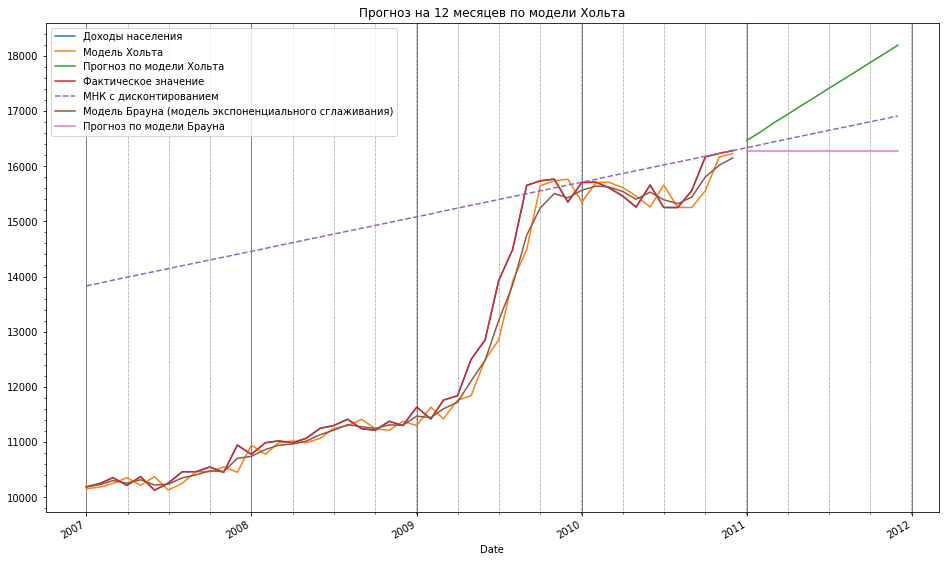

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(y_pred, label = 'Модель Хольта')
ax.plot(model_2.forecast(12), label = 'Прогноз по модели Хольта')
series.plot(label='Фактическое значение')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(df) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')
ax.plot(ema,label='Модель Брауна (модель экспоненциального сглаживания)')
ax.plot(model.predict(start=48, end=59), label='Прогноз по модели Брауна')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Хольта')

plt.show()

In [ ]:
sigma=scipy.stats.sem(y)
sigma

329.7461081311333

In [ ]:
conf=0.95

In [ ]:
tstu=scipy.stats.t.ppf((1+conf)/2.,len(y)-1)
tstu

2.0117405104757546

In [ ]:
y_up=y_new+tstu*sigma
y_up

2011-01-01    17132.566137
2011-02-01    17289.501693
2011-03-01    17446.437250
2011-04-01    17603.372806
2011-05-01    17760.308362
2011-06-01    17917.243918
2011-07-01    18074.179474
2011-08-01    18231.115031
2011-09-01    18388.050587
2011-10-01    18544.986143
2011-11-01    18701.921699
2011-12-01    18858.857256
Freq: MS, dtype: float64

In [ ]:
np.save('income_up.npy',y_up)

In [ ]:
y_down=y_new-tstu*sigma
y_down

2011-01-01    15805.838929
2011-02-01    15962.774486
2011-03-01    16119.710042
2011-04-01    16276.645598
2011-05-01    16433.581154
2011-06-01    16590.516710
2011-07-01    16747.452267
2011-08-01    16904.387823
2011-09-01    17061.323379
2011-10-01    17218.258935
2011-11-01    17375.194492
2011-12-01    17532.130048
Freq: MS, dtype: float64

In [ ]:
np.save('income_down.npy',y_down)

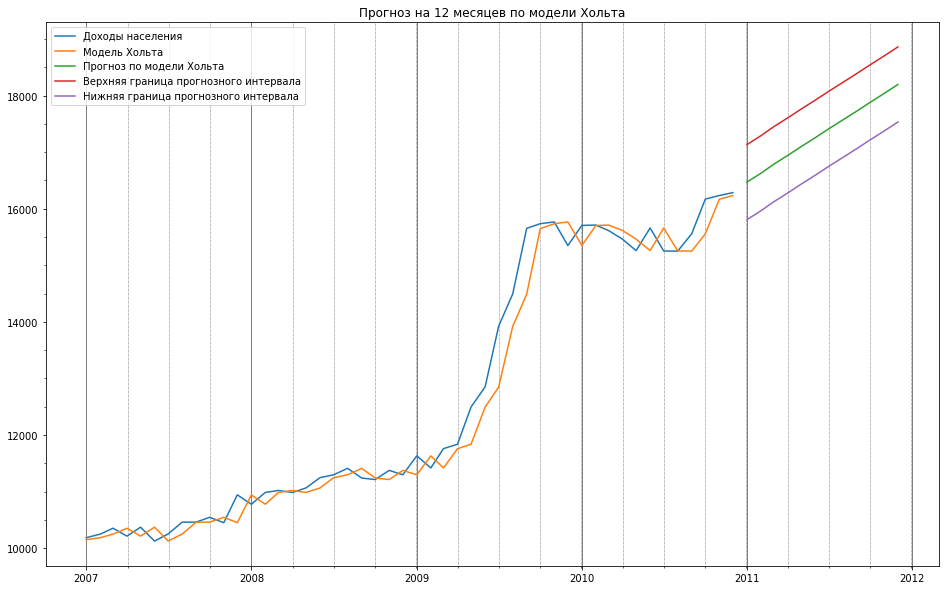

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))
ax.plot(df['Value'], label = 'Доходы населения')
ax.plot(y_pred, label = 'Модель Хольта')
ax.plot(model_2.forecast(12), label = 'Прогноз по модели Хольта')
ax.plot(y_up, label = 'Верхняя граница прогнозного интервала')
ax.plot(y_down, label = 'Нижняя граница прогнозного интервала')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Хольта')

plt.show()